In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline


## Importing Data

In [2]:
df = pd.read_excel('BreastCancer.xlsx')
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         198 non-null    int64  
 1   Outcome                    198 non-null    object 
 2   Time                       198 non-null    int64  
 3   radius_mean                198 non-null    float64
 4   texture_mean               198 non-null    float64
 5   perimeter_mean             198 non-null    float64
 6   area_mean                  198 non-null    float64
 7   smoothness_mean            198 non-null    float64
 8   compactness_mean           198 non-null    float64
 9   concavity_mean             198 non-null    float64
 10  concave_points_mean        198 non-null    float64
 11  symmetry_mean              198 non-null    float64
 12  fractal_dimension_mean     198 non-null    float64
 13  radius_std_dev             198 non-null    float64

,ID,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000


In [4]:
df['Outcome'] = df['Outcome'].map({'N':0, 'R':1})
y = df['Outcome']
df.drop(['ID', 'Lymph_Node_Status', 'Outcome'], axis = 1, inplace = True)
df.head()
cols = list(df.columns)

In [5]:
df=df.drop('Tumor_Size',axis=1)

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time                       198 non-null    int64  
 1   radius_mean                198 non-null    float64
 2   texture_mean               198 non-null    float64
 3   perimeter_mean             198 non-null    float64
 4   area_mean                  198 non-null    float64
 5   smoothness_mean            198 non-null    float64
 6   compactness_mean           198 non-null    float64
 7   concavity_mean             198 non-null    float64
 8   concave_points_mean        198 non-null    float64
 9   symmetry_mean              198 non-null    float64
 10  fractal_dimension_mean     198 non-null    float64
 11  radius_std_dev             198 non-null    float64
 12  texture_std_dev            198 non-null    float64
 13  perimeter_std_dev          198 non-null    float64

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension
count,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,...,21.021818,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828
std,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,...,4.242997,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172
min,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040
25%,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,...,17.632500,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577
50%,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,...,20.525000,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890
75%,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,...,23.730000,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375
max,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,...,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500


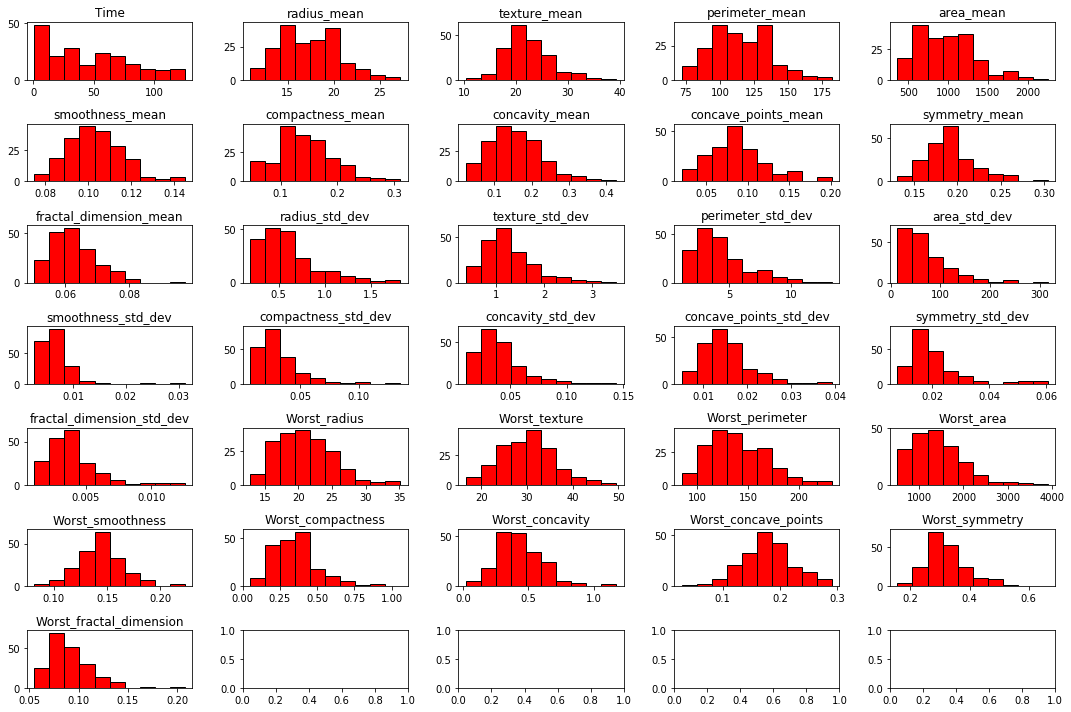

In [7]:


fig, ax = plt.subplots(7,5)
k = 0
for i in range(7):
    for j in range(5):
        ax[i,j].hist(cols[k], data = df, edgecolor= 'black', linewidth= 1, color= 'red')
        plt.subplots_adjust(left=1, bottom=1, right=2, top=2, wspace=1, hspace=1)
        ax[i,j].set_title(str(cols[k]))
        k+=1
        if k==31:
            break
fig.set_size_inches(15,10)
plt.gcf()
fig.tight_layout()

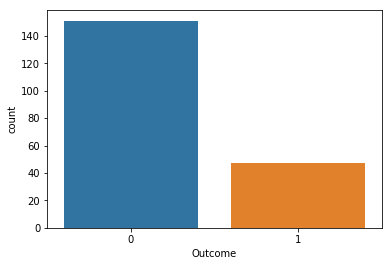

In [8]:
from collections import Counter
Counter(y)
sns.countplot(x = y)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(df)

array([[-0.45765783,  0.19268806,  1.24176957, ..., -1.37081486,
        -0.74300932, -0.45922582],
       [ 0.41505085,  0.18317537, -2.77463023, ...,  1.92211285,
         1.82332146,  1.32925886],
       [ 2.01501676,  1.25493866, -1.12795296, ...,  0.54192348,
         1.46718304, -0.00748783],
       ...,
       [-1.01037333, -0.07683821,  1.61262181, ..., -1.85454683,
         0.17067913, -1.44414722],
       [-1.27218594,  1.27079314,  0.13154523, ...,  0.94799206,
        -0.5362623 , -0.04821054],
       [-1.18491507, -0.22587038,  1.36538698, ..., -1.04462862,
        -0.26549039, -0.49568685]])

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df)

array([[ 4.85461279e+01, -2.28261940e+01, -1.29585373e+01, ...,
        -3.00602139e-03, -3.91144903e-04,  3.03193110e-04],
       [ 5.52613677e+02,  2.81208930e+02, -1.04451654e+01, ...,
        -1.00031644e-03,  1.29216200e-03,  1.38226844e-04],
       [ 6.71628347e+02, -7.25787834e+01,  8.84789896e+01, ...,
        -1.65083611e-03,  1.10041413e-03,  6.30740591e-05],
       ...,
       [-1.22609621e+02, -9.93443479e+00, -3.48441249e+01, ...,
        -1.54793387e-04,  3.30865483e-04, -1.38108248e-04],
       [ 1.08000118e+03,  7.43627218e+01, -3.50600406e+01, ...,
        -1.24793038e-03, -2.31726157e-04, -1.54874083e-04],
       [-2.08351560e+02, -2.54403524e+01, -4.22945594e+01, ...,
        -1.07635729e-03,  7.55229087e-04,  4.41449466e-04]])

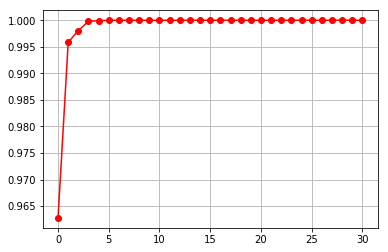

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

In [12]:
pca_new = PCA(n_components=12)
X_new = pca_new.fit_transform(df)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']
acc_score=[]

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc_score.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc_score}

acc_table=pd.DataFrame(d)
acc_table

C:\Users\Govind\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Govind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Modelling Algo,Accuracy
0,LogisticRegression,0.82
1,LinearSVM,0.44
2,rbfSVM,0.82
3,KNearestNeighbors,0.78
4,RandomForestClassifier,0.88
5,DecisionTree,0.78
6,GradientBoostingClassifier,0.84
7,GaussianNB,0.86


In [15]:
from sklearn import metrics

In [16]:
model=RandomForestClassifier(n_estimators=150)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
metrics.accuracy_score(prediction,y_test)

0.86

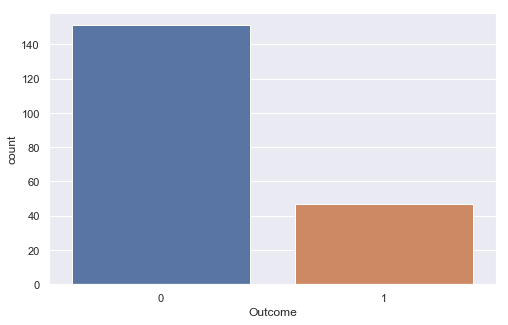

In [17]:
# Plot a countplot
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(y)

In [18]:
count = y.value_counts()
print('Number of Non-Recurrent : ',count[0] )
print('Number of Recurrent : ',count[1])

Number of Non-Recurrent :  151
Number of Recurrent :  47


In [19]:
# Creating a empty list
mean_volume = []
# defining pi
pi = 3.1415

# calculatin mean volume for each mean radius and saving result in mean_volume list
for i in range(len(df)):
    #aving result in mean_volume list
    mean_volume.append((math.pow(df["radius_mean"][i], 3)*4*pi)/3)

# Creating a new feature
df["mean_volume"]= mean_volume

In [20]:
from sklearn import preprocessing
# Define a scaler function
def scaler(df):
    """The Function receive a Dataframe and return a Scaled Dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# testing scaler
scaled_df = scaler(df)

scaled_df.head()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,mean_volume
0,0.241935,0.434542,0.595848,0.413793,0.344948,0.285673,0.216883,0.210069,0.277738,0.321594,...,0.620931,0.371176,0.273322,0.267183,0.140351,0.253067,0.336803,0.219200,0.171127,0.240705
1,0.483871,0.432698,0.000000,0.461887,0.338594,0.622831,0.872621,0.685467,0.700923,0.641455,...,0.020079,0.676411,0.445050,0.570687,0.610208,0.600269,0.904711,0.598462,0.418864,0.239158
2,0.927419,0.640443,0.244291,0.595281,0.535586,0.192026,0.274543,0.252023,0.339930,0.591801,...,0.131123,0.503059,0.424431,0.262208,0.291639,0.276976,0.666679,0.545831,0.233701,0.447955
3,0.983871,0.028888,0.346021,0.051543,0.012974,0.968450,0.896363,0.539745,0.469291,0.744226,...,0.299057,0.093610,0.017556,0.909020,0.809574,0.578454,0.874479,1.000000,0.773711,0.009357
4,0.209677,0.574063,0.137024,0.573503,0.495340,0.363258,0.326927,0.432004,0.464315,0.289261,...,0.000000,0.456152,0.314266,0.394413,0.152669,0.328109,0.510926,0.157500,0.142595,0.373380


In [21]:
from imblearn.over_sampling import ADASYN 

[(0, 151), (1, 146)]


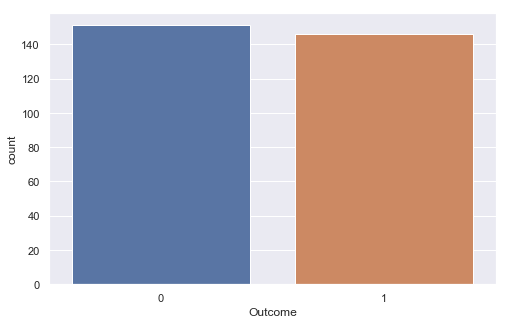

In [22]:
X_resampled, y_resampled = ADASYN().fit_sample(df, y)
import collections
from collections import Counter
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled)

In [31]:
pca_new = PCA(n_components=12)
X_new = pca_new.fit_transform(X_resampled)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_resampled, test_size = 0.25)

In [32]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']
acc_score=[]

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc_score.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc_score}

acc_table=pd.DataFrame(d)
acc_table

C:\Users\Govind\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Govind\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Modelling Algo,Accuracy
0,LogisticRegression,0.760000
1,LinearSVM,0.666667
2,rbfSVM,0.546667
3,KNearestNeighbors,0.493333
4,RandomForestClassifier,0.933333
5,DecisionTree,0.866667
6,GradientBoostingClassifier,0.933333
7,GaussianNB,0.813333


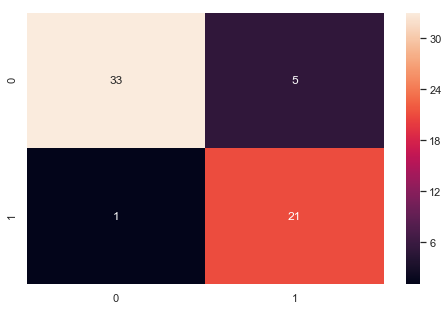

In [47]:
clf=models[4]
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
prediction = pd.DataFrame(pred, columns=['predictions']).to_csv('prediction.csv')
#pred.to_csv(r'C:\Users\Govind\Desktop\Projects\Innovacer\result1.csv')
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt="d")

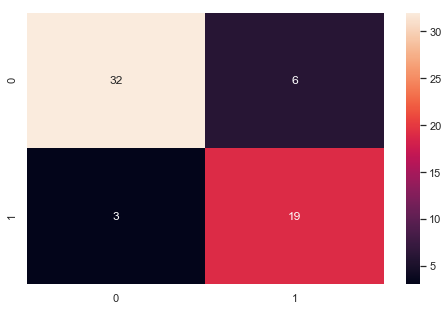

In [46]:
clf=models[6]
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
predictionNB = pd.DataFrame(pred, columns=['predictions']).to_csv('predictionNB.csv')
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt="d")